In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Read the dataset
dataset = pd.read_csv('Naive-Bayes-Classification-Data.csv')
dataset.isnull().any()

glucose          False
bloodpressure    False
diabetes         False
dtype: bool

In [3]:
# Memilih fitur dan label yang akan digunakan
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   glucose        995 non-null    int64
 1   bloodpressure  995 non-null    int64
 2   diabetes       995 non-null    int64
dtypes: int64(3)
memory usage: 23.4 KB


In [4]:
dataset.describe()

,glucose,bloodpressure,diabetes
count,995.000000,995.000000,995.000000
mean,44.306533,79.184925,0.500503
std,6.707567,9.340204,0.500251
min,20.000000,50.000000,0.000000
25%,40.000000,72.000000,0.000000
50%,45.000000,80.000000,1.000000
75%,50.000000,87.000000,1.000000
max,70.000000,100.000000,1.000000


In [5]:
print(x)
print(y)

     glucose  bloodpressure
0         40             85
1         40             92
2         45             63
3         45             80
4         40             73
..       ...            ...
990       45             87
991       40             83
992       40             83
993       40             60
994       45             82

[995 rows x 2 columns]
0      0
1      0
2      1
3      0
4      1
      ..
990    0
991    0
992    0
993    1
994    0
Name: diabetes, Length: 995, dtype: int64


In [6]:
# Split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [7]:
print(x_train)
print(x_test)

     glucose  bloodpressure
457       45             90
317       45             73
1         40             92
38        45             88
367       35             70
..       ...            ...
835       40             65
192       45             85
629       40             83
559       50             90
684       50             75

[746 rows x 2 columns]
     glucose  bloodpressure
420       55             73
985       40             73
31        50             68
692       40             82
553       40             85
..       ...            ...
75        50             67
451       35             72
988       45             90
249       50             73
987       45             90

[249 rows x 2 columns]


In [8]:
print(y_train)
print(y_test)

457    0
317    0
1      0
38     0
367    1
      ..
835    1
192    0
629    0
559    0
684    1
Name: diabetes, Length: 746, dtype: int64
420    1
985    1
31     1
692    1
553    0
      ..
75     1
451    1
988    0
249    1
987    0
Name: diabetes, Length: 249, dtype: int64


In [22]:
# Scaling
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler()
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [23]:
print(x_train)
print(x_test)

[[ 0.08705845  1.11441825]
 [ 0.08705845 -0.71533994]
 [-0.66812298  1.32968392]
 ...
 [-0.66812298  0.36098841]
 [ 0.84223987  1.11441825]
 [ 0.84223987 -0.50007427]]
[[ 1.5974213  -0.71533994]
 [-0.66812298 -0.71533994]
 [ 0.84223987 -1.25350411]
 [-0.66812298  0.25335557]
 [-0.66812298  0.57625408]
 [ 0.84223987  1.65258242]
 [ 0.84223987 -1.03823844]
 [-0.66812298 -1.36113694]
 [ 0.08705845  0.25335557]
 [ 0.08705845 -1.25350411]
 [ 0.08705845  1.65258242]
 [ 0.08705845  0.79151975]
 [-0.66812298 -1.03823844]
 [ 2.35260273 -1.79166828]
 [ 0.08705845 -1.36113694]
 [-0.66812298 -0.2848086 ]
 [ 0.08705845 -0.50007427]
 [ 0.08705845  1.32968392]
 [-0.66812298 -1.03823844]
 [-1.4233044   0.0380899 ]
 [-0.66812298  0.89915258]
 [-0.66812298  0.89915258]
 [-0.66812298  0.0380899 ]
 [-0.66812298  0.36098841]
 [ 0.84223987 -1.36113694]
 [-1.4233044  -1.36113694]
 [ 0.08705845 -0.71533994]
 [-0.66812298  0.0380899 ]
 [ 0.08705845  0.36098841]
 [ 0.08705845  0.57625408]
 [-1.4233044  -1.36113

In [24]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [25]:
y_pred = classifier.predict(x_test)
print(y_pred)

[1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1
 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0
 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0
 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0
 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0
 1 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0]


In [26]:
# Predicting the test set results
y_pred = classifier.predict(x_test)

In [27]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 98   6]
 [ 13 132]]


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17912\158800047.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set==j, 0], x_set[y_set==j, 1],


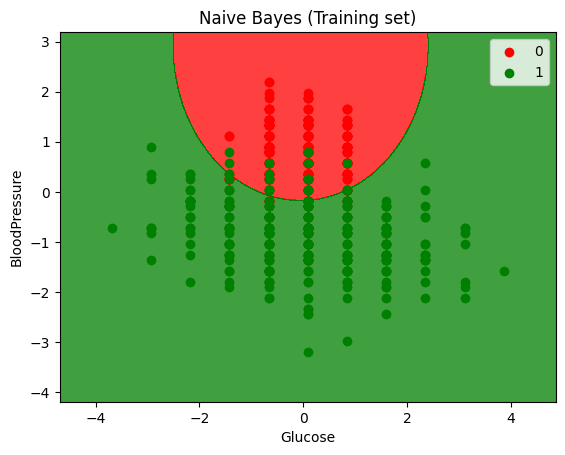

In [28]:
# Visualize
from matplotlib.colors import ListedColormap

x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step=0.01),
                     np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j, 0], x_set[y_set==j, 1], 
                c = ListedColormap(('red', 'green'))(i), label=j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.legend()
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17912\1522411058.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set==j, 0], x_set[y_set==j, 1],


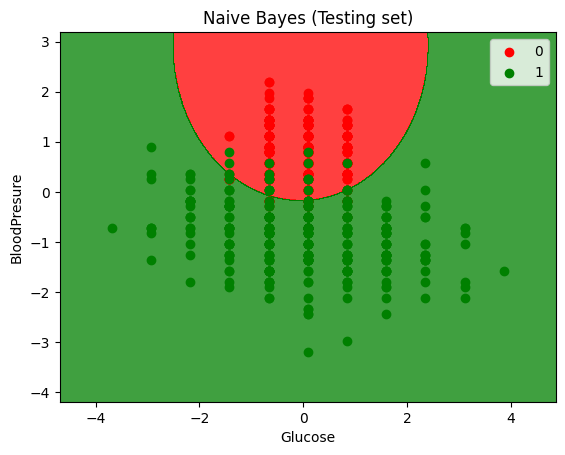

In [29]:
from matplotlib.colors import ListedColormap

x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step=0.01),
                     np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j, 0], x_set[y_set==j, 1], 
                c = ListedColormap(('red', 'green'))(i), label=j)
plt.title('Naive Bayes (Testing set)')
plt.xlabel('Glucose')
plt.ylabel('BloodPresure')
plt.legend()
plt.show()